In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile, scipy.fft, scipy.signal

%config InlineBackend.figure_format = 'svg'

In [2]:
def gaussian(sigma = 1):
    tail = 3 * int(sigma)
    x = np.arange(-tail, tail + 1)
    return np.exp(-(x/sigma)**2 / 2) / (sigma * np.sqrt(2 * np.pi))

In [3]:
def smooth(data, smoothness = 32):
    return scipy.signal.convolve(data, gaussian(sigma = smoothness), mode = 'same')

In [55]:
def splits(data, threshold = 1000, avg_window = 2):
    prev_peaks = [0] * avg_window
    avg = w = 0
    data = np.abs(data)
    for i in range(1, len(data)-1):
        if data[i] > data[i-1] and data[i] > data[i+1]:
            # peak
            if avg_window * data[i] - avg > threshold:
                yield i
            avg += data[i] - prev_peaks[w]
            prev_peaks[w] = data[i]
            w = (w + 1) % avg_window

In [5]:
def threshold(data, min_amplitude = 500):
    for i in range(len(data)):
        if data[i] > min_amplitude:
            return data[i:]

In [6]:
def fourier_transform(data, sample_rate, cutoff_freq = 1000):
    fourier = scipy.fft.fft(data)
    freqs = scipy.fft.fftfreq(len(data), d = 1 / sample_rate)
    return fourier[:cutoff_freq], freqs[:cutoff_freq]

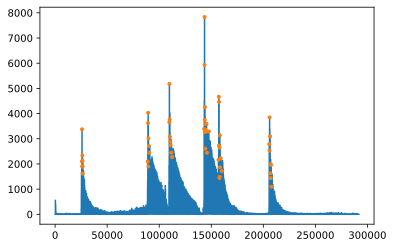

In [57]:
sample_rate, data = scipy.io.wavfile.read('mvt1.wav')
# data = smooth(data[:, 0], smoothness = 1)
data = data[:, 0]
plt.plot(np.abs(data))
markers = [s for s in splits(data, threshold = 1000, avg_window = 1)]
plt.plot(markers, np.abs(data)[markers], '.')

33189 524.79
49517 216.09
50041 467.46000000000004
56882 405.72
58295 414.54
73988 392.49
91904 348.39
134207 330.75
162899 211.68


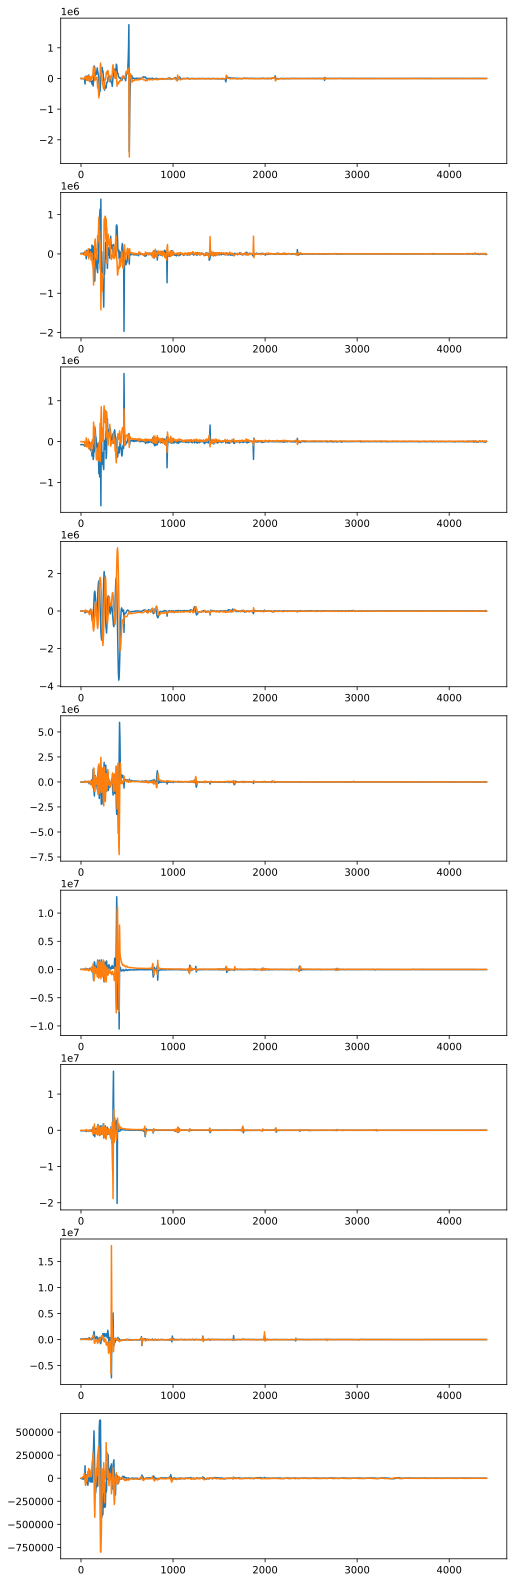

In [40]:
sample_rate, data = scipy.io.wavfile.read('mvt2.wav')
#data = smooth(data[:, 0], smoothness = 1)
data = data[:, 0]
min_gap = 100
prev = -min_gap
fig = plt.figure(figsize = (8, 160))
i = 1
prev_freq = -1
for s in splits(data):
    if s - prev > min_gap:
        ft, freqs = fourier_transform(data[s:s+10000], sample_rate)
        primary_freq = freqs[np.argmax(np.abs(ft))]
        if primary_freq != prev_freq:
            ax = fig.add_subplot(50, 1, i)
            i += 1
            ax.plot(freqs, np.real(ft))
            ax.plot(freqs, np.imag(ft));
            print(s, primary_freq)
            prev_freq = primary_freq
    prev = s